# Using the MNIST for classification
## Install and load libraries

In [1]:
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




## Load the MNIST dataset
Has handwritten numbers from 0-9. We are looking at pixel intensity to determine what the number is
- Black can be represented as 1
- White can be represented as 0

In [2]:
mnist <- dataset_mnist()

In [3]:
mnist

# for the first 64 pixels (in $x), it is representing 5 (in $y)
# for the second set of 64 pixels, it is representing 0

$train
$train$x
, , 1

         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [16,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [17,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [18,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [21,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [25,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [26,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [32,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [36,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [44,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [50,]    0    0    0    0    0    0    0    0    0     0     0     0     0

## Get the train and test set

In [20]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

In [21]:
# how many rows are in train and test
nrow(x_train)
nrow(x_test)

[1] 60000

[1] 10000

In [22]:
# there are 28 pixels?
dim(x_train)
dim(y_train)

[1] 60000    28    28

[1] 60000

In [23]:
y_test
y_test_prev <- y_test

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1
  [109] 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1
  [253] 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 8 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 7 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 8 2 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 1 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 2 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 2 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 7 8 3 3 6 7 2 8 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 4 4 8 5 5 4 0 8 2 1 0 8 4
  [721] 5 0 4 0 6 1 7 3 2 6 7 2 6 9 3 1 4 6 2 5 4 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 9 3 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 1 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 2 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 3 2 6 7 6 6 3 2 7 8 1 1 7 5 6 4 9 5 1 3 3 4 7 8 9 1 1 6 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 6 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 7 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 8 5 9 7 9 6 9 6 3 7 4 4 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 7 4 4 4 4 6 6 4 7 9 3 4 5 5 8 7 3 7 2 7 0 2 4 1 1 6 6 9 2 8 7 2
 [1189] 0 1 5 0 9 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 2 8 7 2 9 8 4 0 9 5 8 5 1 2 1 3 1 7 4 5 7 2 0 9 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 7 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 5 3 3 6 6 0 1
 [1297] 6 0 3 5 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 8 8 7 9 4 8 8 7 9 7 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 8 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 5 0 9 2 4 3 3 9 7 6 6 8 0 4 1 5 8 2 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 9 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 7 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 7 8 8 5 0 1 1 4 8 3 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 4 5 2 4 9 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 2 0 3 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 2 4 4 3 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 9 7 2 0 0 9 1 7 8 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 4 5 1 7 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 1 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 2 1 7 9 0 2 0 3 3 7
 [18

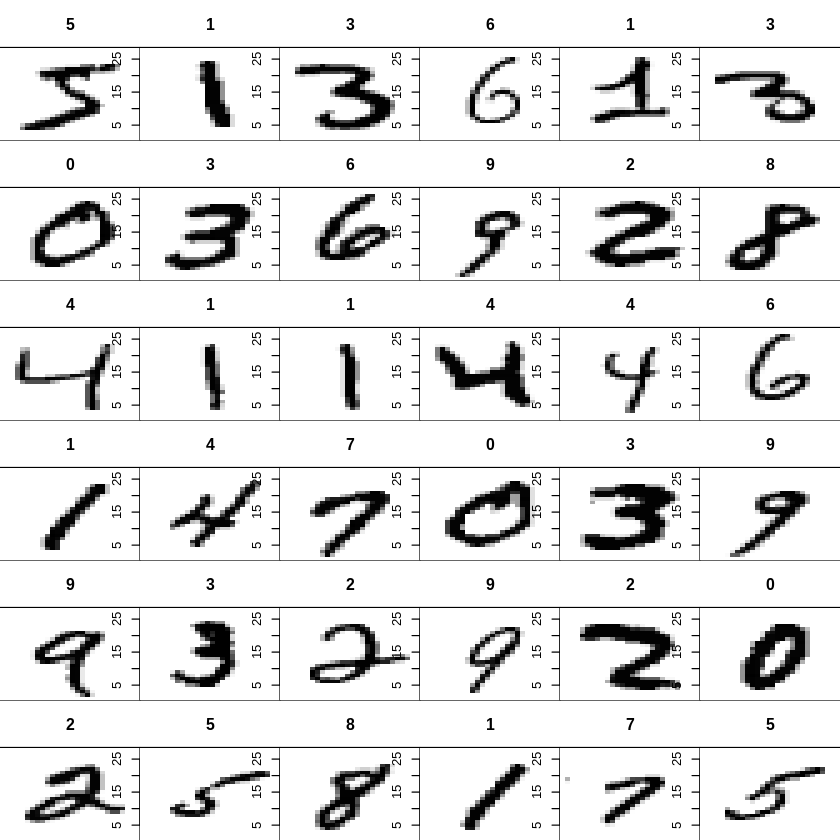

In [24]:
# visualize what the digits look like
par(mfcol=c(6,6)) # create 6x6 subplots - column-wise fill
par(mar=c(0, 0, 3, 0))
for (idx in 1:36) {     # in the first 36 cells (6x6)
    im <- x_train[idx,,]
    im <- t(apply(im, 2, rev))
    # we're passing the first 28 pixels. gray() makes it grayscale. 255:0 tells that it's a 256 bit image (more useful for colored images)
    image(1:28, 1:28, im, col=gray((255:0)/255), xaxt='n', main=paste(y_train[idx]))
}

# the number above the image is the label it's supposed to be

In [25]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))  # 784 is 28*28 to get total number of pixels
x_test <- array_reshape(x_test, c(nrow(x_test), 784))     # one long combined vector of 784 pixels

# rescale
x_train <- x_train / 255
x_test <- x_test / 255

# convert the numerical values to categorical
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

In [26]:
dim(x_train)
dim(y_train)

# we can see that it's 1D now

[1] 60000   784

[1] 60000    10

In [27]:
# we're predicting true/false
y_test

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 0    0    0    0    0    0    0    1    0    0    
 [2,] 0    0    1    0    0    0    0    0    0    0    
 [3,] 0    1    0    0    0    0    0    0    0    0    
 [4,] 1    0    0    0    0    0    0    0    0    0    
 [5,] 0    0    0    0    1    0    0    0    0    0    
 [6,] 0    1    0    0    0    0    0    0    0    0    
 [7,] 0    0    0    0    1    0    0    0    0    0    
 [8,] 0    0    0    0    0    0    0    0    0    1    
 [9,] 0    0    0    0    0    1    0    0    0    0    
[10,] 0    0    0    0    0    0    0    0    0    1    
[11,] 1    0    0    0    0    0    0    0    0    0    
[12,] 0    0    0    0    0    0    1    0    0    0    
[13,] 0    0    0    0    0    0    0    0    0    1    
[14,] 1    0    0    0    0    0    0    0    0    0    
[15,] 0    1    0    0    0    0    0    0    0    0    
[16,] 0    0    0    0    0    1    0    0    0    0    
[17,] 0    0    0    0    0    0    0    0    0    1    
[18,] 0    0    0    0    0    0    0    1    0    0    
[19,] 0    0    0    1    0    0    0    0    0    0    
[20,] 0    0    0    0    1    0    0    0    0    0    
[21,] 0    0    0    0    0    0    0    0    0    1    
[22,] 0    0    0    0    0    0    1    0    0    0    
[23,] 0    0    0    0    0    0    1    0    0    0    
[24,] 0    0    0    0    0    1    0    0    0    0    
[25,] 0    0    0    0    1    0    0    0    0    0    
[26,] 1    0    0    0    0    0    0    0    0    0    
[27,] 0    0    0    0    0    0    0    1    0    0    
[28,] 0    0    0    0    1    0    0    0    0    0    
[29,] 1    0    0    0    0    0    0    0    0    0    
[30,] 0    1    0    0    0    0    0    0    0    0    
[31,] ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    ⋮    
[32,] 0    0    0    0    0    1    0    0    0    0    
[33,] 0    0    1    0    0    0    0    0    0    0    
[34,] 0    0    0    0    1    0    0    0    0    0    
[35,] 0    0    0    0    0    0    0    0    0    1    
[36,] 0    0    0    0    1    0    0    0    0    0    
[37,] 0    0    0    1    0    0    0    0    0    0    
[38,] 0    0    0    0    0    0    1    0    0    0    
[39,] 0    0    0    0    1    0    0    0    0    0    
[40,] 0    1    0    0    0    0    0    0    0    0    
[41,] 0    0    0    0    0    0    0    1    0    0    
[42,] 0    0    1    0    0    0    0    0    0    0    
[43,] 0    0    0    0    0    0    1    0    0    0    
[44,] 0    0    0    0    0    1    0    0    0    0    
[45,] 1    0    0    0    0    0    0    0    0    0    
[46,] 0    1    0    0    0    0    0    0    0    0    
[47,] 0    0    1    0    0    0    0    0    0    0    
[48,] 0    0    0    1    0    0    0    0    0    0    
[49,] 0    0    0    0    1    0    0    0    0    0    
[50,] 0    0    0    0    0    1    0    0    0    0    
[51,] 0    0    0    0    0    0    1    0    0    0    
[52,] 0    0    0    0    0    0    0    1    0    0    
[53,] 0    0    0    0    0    0    0    0    1    0    
[54,] 0    0    0    0    0    0    0    0    0    1    
[55,] 1    0    0    0    0    0    0    0    0    0    
[56,] 0    1    0    0    0    0    0    0    0    0    
[57,] 0    0    1    0    0    0    0    0    0    0    
[58,] 0    0    0    1    0    0    0    0    0    0    
[59,] 0    0    0    0    1    0    0    0    0    0    
[60,] 0    0    0    0    0    1    0    0    0    0    
[61,] 0    0    0    0    0    0    1    0    0    0

## Define the model
We begin by creating a sequential model and then adding layers using
the pipe (%>%) operator:

In [29]:
model <- keras_model_sequential()
model %>%
  # there are 256 possible pixel intensities from 0 to 1 (0 to 255)
  # activation = relu : allows you to propogate few errors
  # input_shape: what is the feature vector length
  layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>%

  # we only need to learn edges. if the edge activation is > 0.4, then send info to next layer. else, don't send
  # the higher the rate, the more specific you are > inputs will be less
  layer_dropout(rate = 0.4) %>%

  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = 'softmax')

In [31]:
summary(model)

# contains 1 dense layer of 256 units; 200960 parameters are possible probability numbers
# one dropout layer of 256 units
# next layer is 128 units
# next dropout layer is 128 units
# last layer is 10 units

# sum of parameters # = 235146

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 256)                     200960      
 dropout_3 (Dropout)                (None, 256)                     0           
 dense_4 (Dense)                    (None, 128)                     32896       
 dropout_2 (Dropout)                (None, 128)                     0           
 dense_3 (Dense)                    (None, 10)                      1290        
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [37]:
model %>% compile(
  # loss: computs the entropy loss between labels and predicted labels
  # tells you how different something is from the actual label
  loss = 'categorical_crossentropy', # the metric used in the validation step to know if you're training model correctly
  optimizer = optimizer_rmsprop(),
  metrics = c('AUC')
)

## Fit the model

In [39]:
history <- model %>% fit( # train using fit()
  x_train, y_train,
  # epochs: how many times a model will go over the data
  # batch_size: through every iteration, the model should take 128 rows
  epochs = 8, batch_size = 128,
  validation_split = 0.2
)

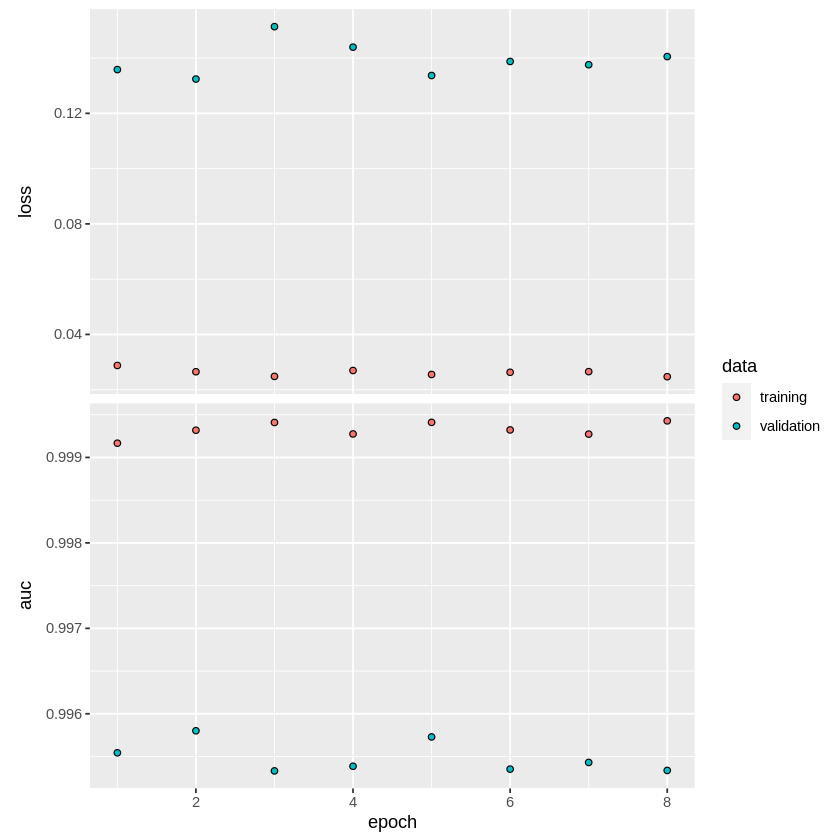

In [40]:
plot(history)
# the closer the loss (categorical_crossentropy), the better
# if validation should continue to decrease. if it increases, it's referred of convergence - we designed architecture incorrectly and need to change something in the loss function, dropout, or metric.
# if training is decreasing after convergence meaning it's not learning well anymore
# whenever you see convergence, we should stop training the data

# Testing the model

In [41]:
model %>% evaluate(x_test, y_test)
# AUC tells us that 96% of the data was correctly predicted

loss       auc 
0.1271353 0.9958664

In [42]:
#Generate predictions on the test data:
predicted_values <- model %>% predict(x_test) %>% k_argmax()
cat("predicted_values",as.vector(predicted_values),"\n")
cat("original_values ",as.vector(y_test_prev),"\n")

predicted_values 7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 3 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 2 4 2 4 1 9 5 7 7 2 8 2 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0 2 0 6 4 9 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5

# Lets try to do object identification

In [43]:
 download.file("http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar", "VOCtrainval_06-Nov-2007.tar")

In [44]:
 download.file("https://s3.amazonaws.com/images.cocodataset.org/external/external_PASCAL_VOC.zip","PASCAL_VOC.zip")

# Untar the file

In [45]:
untar("VOCtrainval_06-Nov-2007.tar")

# Get the JPEGImages folder from the extracted untar folder

In [46]:
img_dir <- "VOCdevkit/VOC2007/JPEGImages"

In [47]:
zipF<- "PASCAL_VOC.zip"
outDir<-"/outfolder"
unzip(zipF,exdir=outDir)


In [48]:
annot_file <- "/outfolder/PASCAL_VOC/pascal_train2007.json"

# Pascal VOC

## Get required libraries

In [49]:
library(keras)
install.packages("rjson")
library(rjson)
system('add-apt-repository -y ppa:cran/imagemagick')
system('apt-get update')
system("apt-get install libmagick++-dev")
install.packages("magick")
library(magick)
library(purrr)
library(tibble)
library(tidyr)
library(dplyr)
library(ggplot2)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Linking to ImageMagick 6.9.11.60
Enabled features: fontconfig, freetype, fftw, heic, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, raw, rsvg

Using 2 threads


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [50]:
install.packages("IRdisplay")
install.packages("jpeg")
library(IRdisplay)
library(jpeg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [65]:
# checking what the annotations contain
annotations <- fromJSON(file = annot_file)
str(annotations, max.level = 1)
imageinfo <- annotations$images %>% {
  tibble(
    id = map_dbl(., "id"),
    file_name = map_chr(., "file_name"),
    image_height = map_dbl(., "height"),
    image_width = map_dbl(., "width")
  )}


List of 4
 $ images     :List of 2501
 $ type       : chr "instances"
 $ annotations:List of 7844
 $ categories :List of 20


All the 20 classes and the bounding boxes for those:

In [66]:
# our model will only look at these classes
# loss function: categorical entropy
# activation: softmax because output is categorical but out of 20 variables
classes <- c(
  "aeroplane","bicycle","bird","boat","bottle","bus","car","cat","chair","cow","diningtable",
  "dog","horse","motorbike","person","pottedplant","sheep","sofa","train","tvmonitor")
boxinfo <- annotations$annotations %>% {
  tibble(
    image_id = map_dbl(., "image_id"),
    category_id = map_dbl(., "category_id"),
    bbox = map(., "bbox")
  )
}

The bounding boxes are now stored in a list column and need to be
unpacked.

In [67]:
boxinfo <- boxinfo %>%
  mutate(bbox = unlist(map(.$bbox, function(x) paste(x, collapse = " "))))
boxinfo <- boxinfo %>%
  separate(bbox, into = c("x_left", "y_top", "bbox_width", "bbox_height")) # positioning of the box
boxinfo <- boxinfo %>% mutate_all(as.numeric) # load as numeric values

For the bounding boxes, the annotation file provides x_left and y_top coordinates, as well as width
and height. We will mostly be working with corner coordinates, so we create the missing x_right and
y_bottom:

In [68]:
boxinfo <- boxinfo %>%
  mutate(y_bottom = y_top + bbox_height - 1, x_right = x_left + bbox_width - 1)

Finally, we still need to match class ids to class names.

In [69]:
catinfo <- annotations$categories %>%  {
  tibble(id = map_dbl(., "id"), name = map_chr(., "name"))
}
# All together
imageinfo <- imageinfo %>%
  inner_join(boxinfo, by = c("id" = "image_id")) %>%
  inner_join(catinfo, by = c("category_id" = "id"))

#scaling
target_height <- 224 # that's the default in which the layers were learned about the edges, weights, etc
target_width <- 224

# thus, our vector will have 224*224 = 50,176 values

For the bounding boxes, the annotation file provides x_left and y_top coordinates, as well as width
and height. We will mostly be working with corner coordinates, so we create the missing x_right and
y_bottom:

In [70]:
imageinfo <- imageinfo %>% mutate(
  # changing the image size to 224 by 224
  # since we made the bounding box this dimensions and we don't want the images to still be small
  x_left_scaled = (x_left / image_width * target_width) %>% round(),
  x_right_scaled = (x_right / image_width * target_width) %>% round(),
  y_top_scaled = (y_top / image_height * target_height) %>% round(),
  y_bottom_scaled = (y_bottom / image_height * target_height) %>% round(),
  bbox_width_scaled =  (bbox_width / image_width * target_width) %>% round(),
  bbox_height_scaled = (bbox_height / image_height * target_height) %>% round()
)
#Now lets see the data
img_data <- imageinfo[4,]
img <- image_read(file.path(img_dir, img_data$file_name))
img <- image_draw(img)
rect(
  img_data$x_left,img_data$y_bottom,img_data$x_right,img_data$y_top,border = "white",lwd = 2
)
text(
  img_data$x_left,img_data$y_top,img_data$name,offset = 1,pos = 2,cex = 1.5,col = "white"
)
dev.off()

png 
  2

In [71]:
img_data$file_name

[1] "000023.jpg"

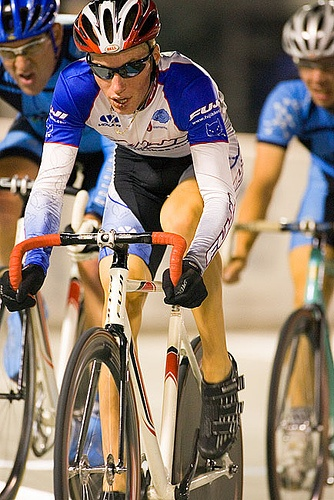

In [72]:
image_path <- "/content/VOCdevkit/VOC2007/JPEGImages/000023.jpg"
img <- readJPEG(image_path, native = TRUE)

# Display the image
display_png(file = image_path)

We’ll mostly address handling a single object in an image. This means we have to decide, per image,
which object to single out. A reasonable strategy seems to be choosing the object with the largest
ground truth bounding box.

In [73]:
imageinfo <- imageinfo %>% mutate(area = bbox_width_scaled *
bbox_height_scaled)
imageinfo_maxbb <- imageinfo %>%
  group_by(id) %>%
  filter(which.max(area) == row_number())
#Now train-test split
n_samples=nrow(imageinfo_maxbb)
train_indices <- sample(1:n_samples, 0.8 * n_samples)
train_data <- imageinfo_maxbb[train_indices,]
validation_data <- imageinfo_maxbb[-train_indices,]

In [74]:
train_indices

[1]  765 1083  577 1176   50 1871  664 1790 2079 1708  204 2212 2170 1754
  [15]  942 1332  499 1913  982 1624 1515  723 1812  380  787 1214 1328 2411
  [29] 2285 1833 1637  614 1763 1844 1557  387  308  610  918 1842  864  967
  [43] 2306  297 1545 1146 2181 1329  777 2042 2136 2471  631 2268 1131 1789
  [57] 2148 2399 2443 1135 1752  375 1891 1744 2496 1549 1924  383   82 1967
  [71] 1021 1837   12  568 2272  961 1042 1578 1041 2139 1365 1208 1747 2384
  [85]  173 1183 1157 1117 1995 2128  205 1553 2321   62 2425 1269   66 1495
  [99] 1854  128 2435  974  120  394  708  459 2387  314 1970 1461  137 1737
 [113]  420 2335  259  971 2048 1457 1870 1172 1430 1932  446 1940 2085 1456
 [127]  445 1061  832  801 1664 2031  363  595  288 1311 1102  743 1554  356
 [141] 1699  119 1205 1265 2477 1785  285 1804 2417 1508  883 1524 1424  332
 [155] 1258 1288  937 1933 1421 1177 2210 1014  700  541   11 1080   85 1145
 [169]  480   87  947  443  231 1984   13  987 1905  854  665 2458 2173  803
 [183] 1659 1773 1892 2489 1735  547 1151 2373 2218  318 1611 1899 2501 1037
 [197] 1233  167 2439 1731  397 1341   69 1405 2150  751   32 2462 1786 2480
 [211] 1150 1224 1396 1772  125   56  178 2455 1391  519  563  492 1063 2322
 [225] 1030  739 1936  920 1046  396  824 1952 2075 1832  897 1439 1100 1914
 [239]  509  427  624 1485 2386 2428  859  699 1863 2044  904 1325 1867 2392
 [253] 1271 1632 1647 1745 1128 1797 1985 2230 1843 1660  255 1600  246  304
 [267] 2291  241  936  176 1466 2249  454 1299   70 2208  875 1769 1962 1121
 [281]   80  923  744  628 2424  662 2353 1308 1835  770  964  290 1373 1413
 [295] 2275  613 2154 2383 1961  965   55  872 1309 1197 1144  572 1085 2242
 [309] 1577   23 2376 1792 2141 2198 2225 1879 1408 1989  512  636  390 1886
 [323] 1878 2143  153  678 1999  921 1764  147 1296 1237 1519 1469  760  328
 [337] 2025  210  968  353  881  405 1834  200  257  834 1661 1830  782 1743
 [351]  896 1016 2009  101  192 1951  235 1639 1440 1209  264 1379  248  889
 [365]  543  879  321 1273  191  522  223 2162  672   77  890  647  419 1651
 [379] 2199 1724   20  591 1453 1643  585  780  822 2187 2246 2346   91  653
 [393] 1290 1132  366 2071 1780  804 2317  584 2019  762  362  439  296  774
 [407] 1416 1374 1047 1526  809  821  985  948 1106 1919  855  160  559 2102
 [421]  224  583  962 2403 1690 1223 1161 1697 2120  902 1091 1022 1510  997
 [435]  280 1256 1118  323 2023 2473 1775 2343 1249 1595 1159   16  938 1217
 [449]  795  724  374  637 1112  841  115 2483  580  544 1367 2247 1115 1497
 [463]  529  485 1026 1771   97 1876 1847  601  720 1010 1748 2177 2216  448
 [477] 1864 1757  216  755 1988 1317 1266 2319 2111  252 1277 1078 1222 2007
 [491] 1412 1487 1394  561 2438 1628 1727 2243 1072 1305  482 2127 2201  565
 [505] 1203 1378  785  330   36  627 1663 1765  807 1285  844  276  175 2495
 [519] 1077  156 1415  217  140 2132  162  586 2420 1003 1388 1794  929   29
 [533] 2284  143 1045   10  502  900 2481 2095 2472 1787  878  326 2389 2314
 [547] 2223 1216 1810   26  722  378  239 1910 1565  949 1722 2467 1480   14
 [561]  679 2217  339 2037 1126  152  337 1733 2378 1770 1431  227 1587 1555
 [575] 1610 1221 1138  546 1868 1054 2059 2105 2422  442 1315 1073 2476 1809
 [589] 1109 2485  915  414  343 1141  960 1596  466  783  616 1713   47 1051
 [603] 1395 2232  752 2064 2464 2327  625  641 1648  416 1180 2011  262 1417
 [617]   42 1058  325  731 2482 2189 2117 1142 2381 1546 2362 1590   30 1155
 [631] 2419 2407 1895 2358 2359  155 2394 2256 1363 2159 1454 1350 2468 1068
 [645] 1483 1463 1866  327 1682  219 2345  849  650 1760 1340  924 2167 1761
 [659] 2324 1247  352  426  411 1018 2388 1746 1726 1992  477  993 1292 2092
 [673] 1969  100  759 1444 2415 2169 2260  858 2414 1193 2220  999 2265  712
 [687] 1846  164 1165  866 1948   28 1359  793  367 1851 1411 1869 1338 1452
 [701]  299 1644 1650  424 1226 1347 2276  503 1331  263  516  840 1930 1043
 [715]  552 2367 1082 2326 1381 1254 1191 1134 2391 1459 1990  524  645 1242

In [75]:
length(train_indices) # we selected 2000 for training

[1] 2000

# Pascal VOC - Model Building
In all cases, we will use XCeption as a basic feature extractor. Having been trained on ImageNet,
we don’t expect much fine tuning to be necessary to adapt to Pascal VOC, so we leave XCeption’s
weights untouched.

In [78]:
feature_extractor <-
  application_xception(include_top = FALSE, input_shape = c(224, 224, 3), pooling = "avg"
)
# we only do the supervised parts by freezing the lower layers
# we got the supervised parts from running xception
feature_extractor %>% freeze_weights()
#Adding some custom layers
model <- keras_model_sequential() %>% # add additional laters to feature_extractor model
  feature_extractor %>%
  layer_batch_normalization() %>% # if you give an image with a lot of blue colors, we don't want it to affect the model. we're normalizing images across vectors so that one weight doesn't get too high
  layer_dropout(rate = 0.25) %>%
  layer_dense(units = 512, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 20, activation = "softmax") # 20 because we have 20 labels
model %>% compile(
  optimizer = "adam", # adam: the most cutting edge object detector
  loss = "sparse_categorical_crossentropy", # sparse : compautes crossentropy loss when there are 2+ label classes. used when you don't want to convert class labels using one-hot encoded
  metrics = list("accuracy")
)

model

# xception is not trainable because we froze it

Model: "sequential_4"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 xception (Functional)         (None, 2048)               20861480   N          
 batch_normalization_17 (Batc  (None, 2048)               8192       Y          
 hNormalization)                                                                
 dropout_9 (Dropout)           (None, 2048)               0          Y          
 dense_11 (Dense)              (None, 512)                1049088    Y          
 batch_normalization_16 (Batc  (None, 512)                2048       Y          
 hNormalization)                                                                
 dropout_8 (Dropout)           (None, 512)                0          Y          
 dense_10 (Dense)              (None, 20)                 10260      Y          
Total params: 21931068 (83.66 MB)
Trainable params: 1064468 (4.06 MB)
Non-trainable par

In [79]:
# scaling the test data to 224 by 224
load_and_preprocess_image <- function(image_name, target_height, target_width) {
  img_array <- image_load(
    file.path(image_name),
    target_size = c(target_height, target_width)
    ) %>%
    image_to_array() %>%
    xception_preprocess_input()
  dim(img_array) <- c(1, dim(img_array))
  img_array
}

In [83]:
preds <-model %>% predict(load_and_preprocess_image("/content/car.jpeg", target_height, target_width))

In [84]:
preds
# not doing a good job on a new dataset it hasn't seen before
# need to refine the labels and rerun the model

[,1]       [,2]       [,3]       [,4]       [,5]       [,6]      
[1,] 0.04429847 0.05596172 0.05534789 0.05547014 0.05091715 0.04714805
     [,7]       [,8]       [,9]       [,10]      [,11]      [,12]     
[1,] 0.04164198 0.05159212 0.03582047 0.05877155 0.03848659 0.04425654
     [,13]      [,14]      [,15]      [,16]      [,17]      [,18]    
[1,] 0.03082113 0.03656351 0.04630224 0.05490555 0.06689091 0.0560123
     [,19]      [,20]     
[1,] 0.04948847 0.07930319

Try on the training data and see the boxes

In [ ]:
load_and_preprocess_image <- function(image_name, target_height, target_width) {
  img_array <- image_load(
    file.path(img_dir, image_name),
    target_size = c(target_height, target_width)
    ) %>%
    image_to_array() %>%
    xception_preprocess_input()
  dim(img_array) <- c(1, dim(img_array))
  img_array
}

plot_image_with_boxes <- function(file_name,
                                  object_class,
                                  box,
                                  scaled = FALSE,
                                  class_pred = NULL,
                                  box_pred = NULL) {
  img <- image_read(file.path(img_dir, file_name))
  if(scaled) img <- image_resize(img, geometry = "224x224!")
  img <- image_draw(img)
  x_left <- box[1]
  y_bottom <- box[2]
  x_right <- box[3]
  y_top <- box[4]
  rect(
    x_left,
    y_bottom,
    x_right,
    y_top,
    border = "cyan",
    lwd = 2.5
  )
  text(
    x_left,
    y_top,
    object_class,
    offset = 1,
    pos = 2,
    cex = 1.5,
    col = "cyan"
  )
  if (!is.null(box_pred))
    rect(box_pred[1],
         box_pred[2],
         box_pred[3],
         box_pred[4],
         border = "yellow",
         lwd = 2.5)
  if (!is.null(class_pred))
    text(
      box_pred[1],
      box_pred[2],
      class_pred,
      offset = 0,
      pos = 4,
      cex = 1.5,
      col = "yellow")
  dev.off()
  img %>% image_write(paste0("preds_", file_name))
  plot(img)
}

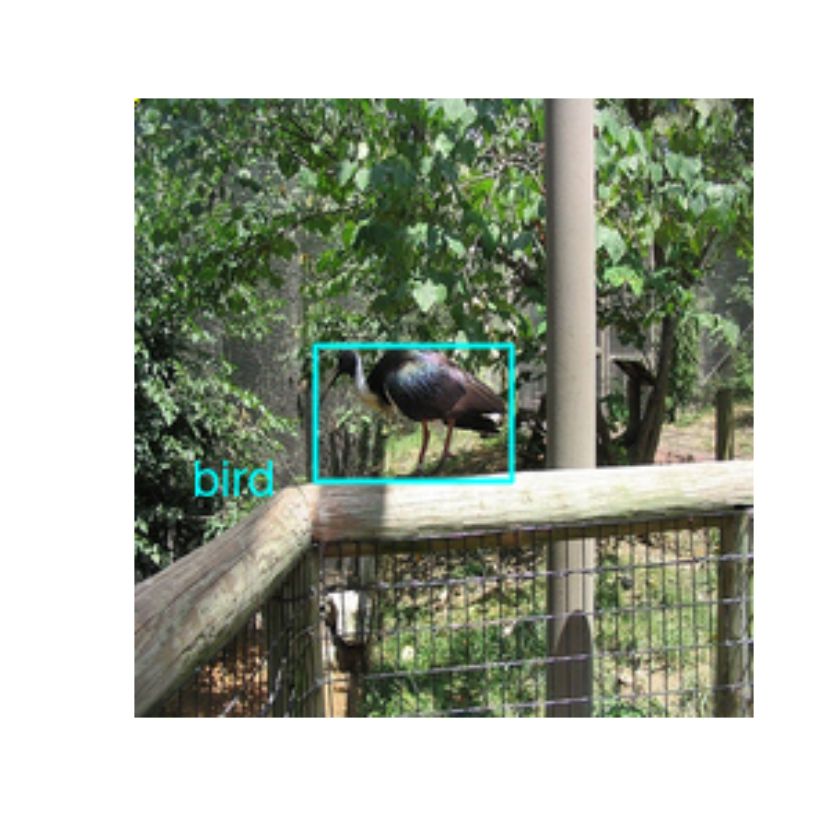

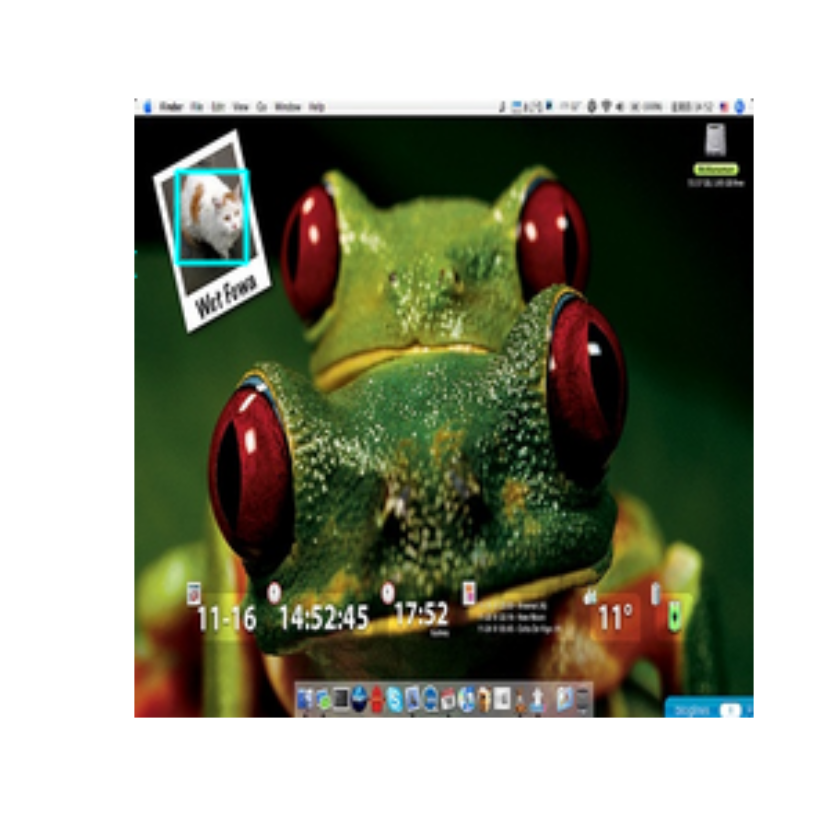

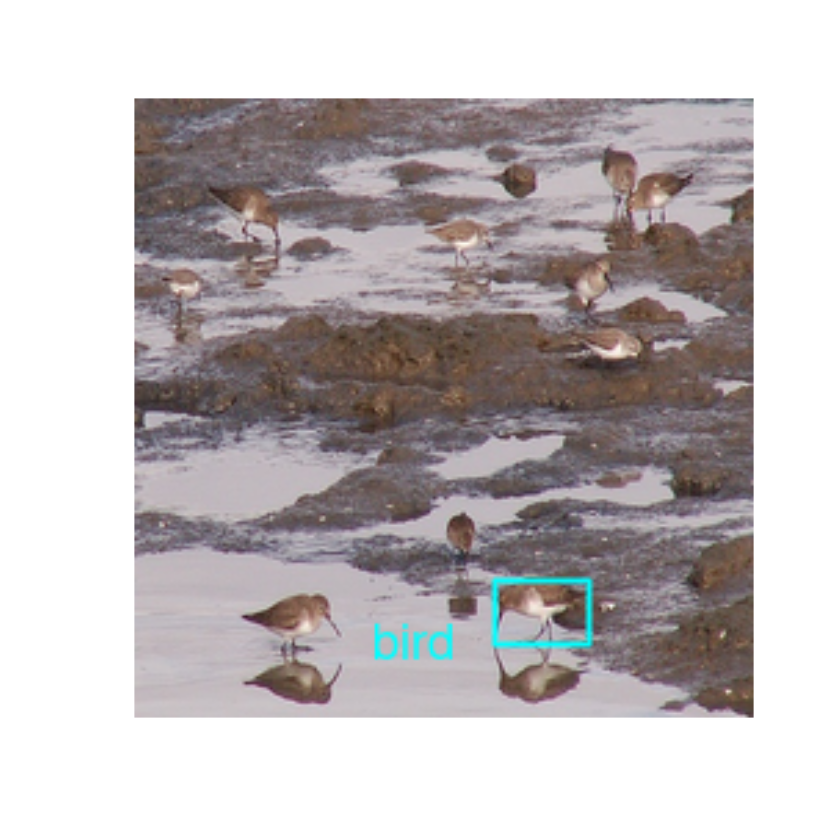

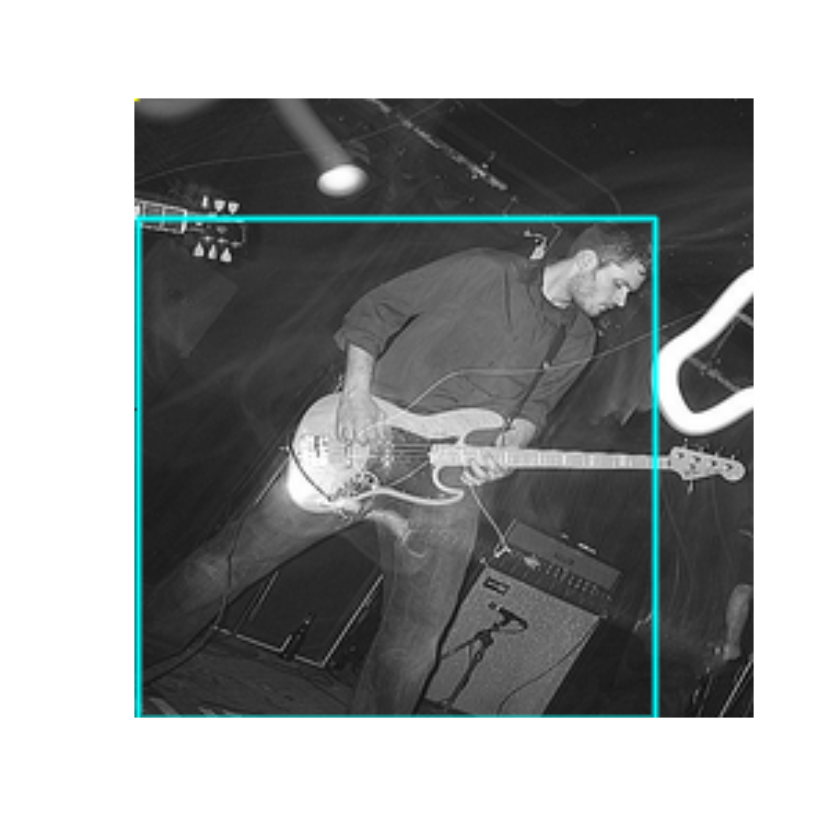

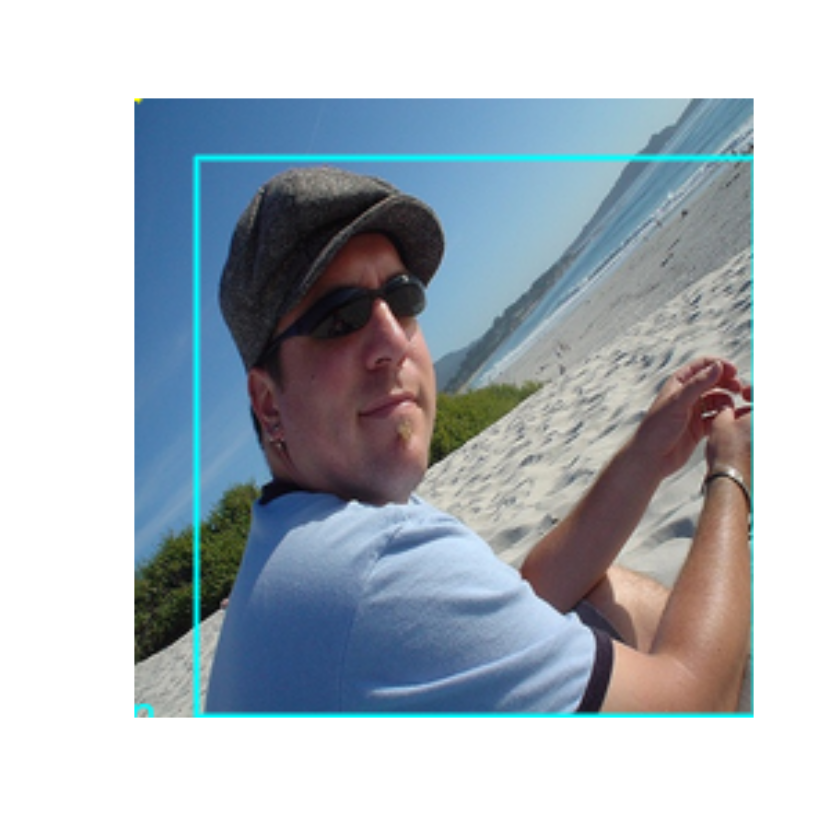

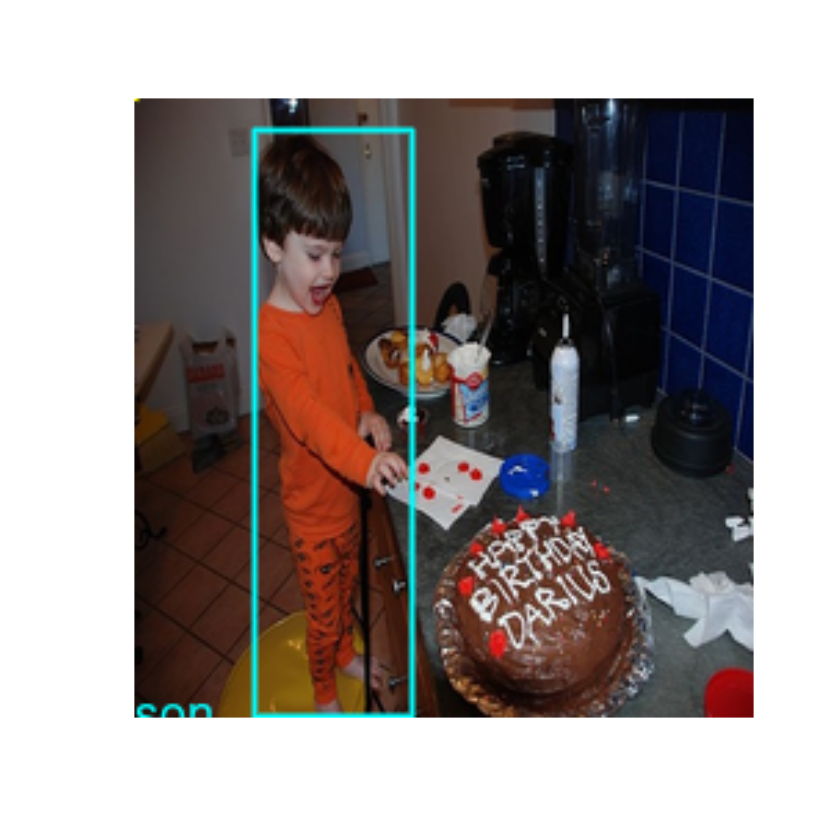

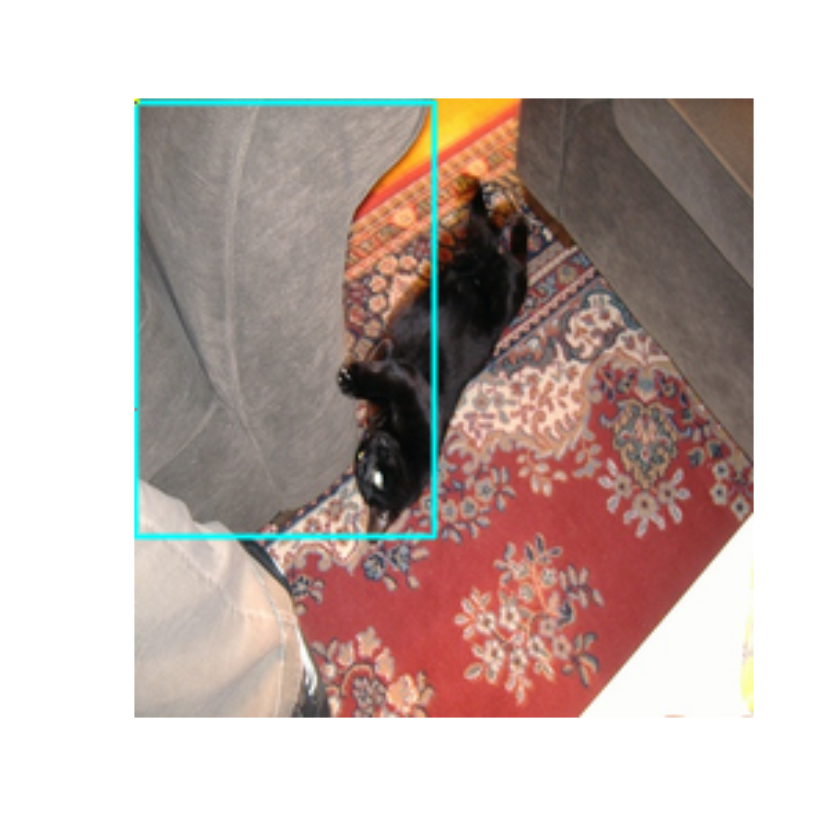

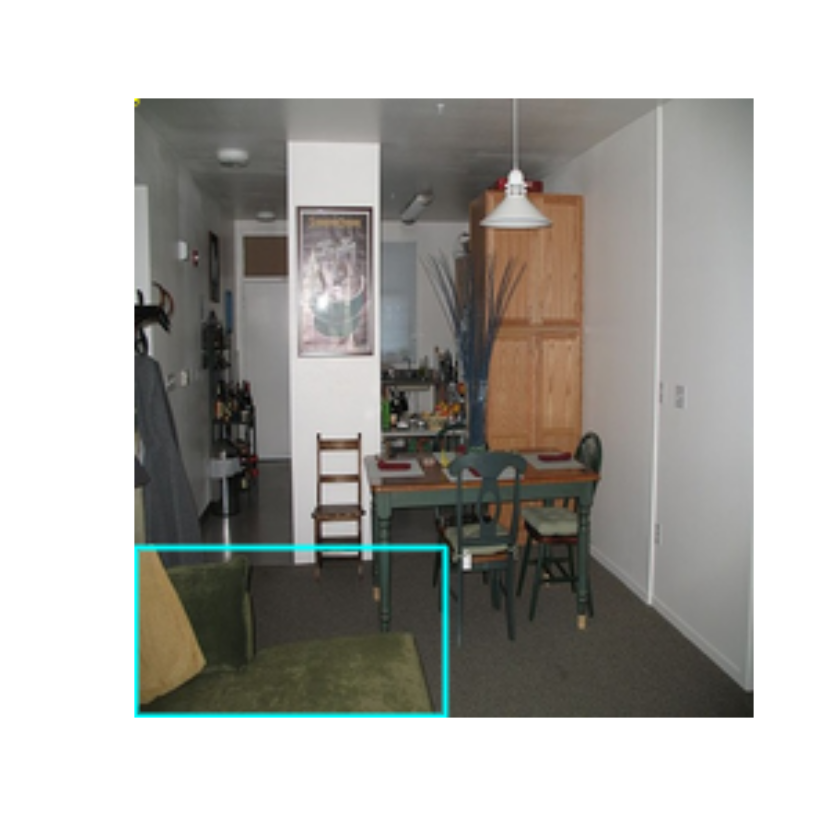

In [ ]:
train_1_8 <- train_data[1:8, c("file_name",
                               "name",
                               "x_left_scaled",
                               "y_top_scaled",
                               "x_right_scaled",
                               "y_bottom_scaled")]

for (i in 1:8) {
  preds <-
    model %>% predict(
      load_and_preprocess_image(train_1_8[i, "file_name"],
                                target_height, target_width),
      batch_size = 1
  )
  plot_image_with_boxes(train_1_8$file_name[i],
                        train_1_8$name[i],
                        train_1_8[i, 3:6] %>% as.matrix(),
                        scaled = TRUE,
                        box_pred = preds)
}

## Using pre-trained model for object detection
Here, we'll use Tiny YOLO, a smaller version of YOLO, that's more suitable for mobile machine
learning and IoT devices.

In [85]:
devtools::install_github("bnosac/image", subdir = "image.darknet", build_vignettes = TRUE, force=TRUE)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpjYXyVp/remotes11d4b714a98/bnosac-image-cc182fd/image.darknet/DESCRIPTION’ ... OK
* preparing ‘image.darknet’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘image.darknet_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [86]:
library(image.darknet)

yolo_tiny_voc <- image_darknet_model(type = 'detect', model = "tiny-yolo-voc.cfg",
        weights = system.file(package="image.darknet", "models", "tiny-yolo-voc.weights"),
        labels = system.file(package="image.darknet", "include", "darknet", "data", "voc.names"))

In [89]:
x <- image_darknet_detect(file='/content/Golden-Retriever-Puppy.jpeg',object = yolo_tiny_voc)

In [90]:
x

NULL

In [ ]:
# install.packages("imager")
# library(imager)

In [ ]:
# Preprocess the image
preprocess_input <- function(img_path) {
  img <- image_load(img_path, target_size = c(224, 224))
  img <- image_to_array(img)
  img <- array_reshape(img, c(1, dim(img)))
  img <- imagenet_preprocess_input(img)
  return(img)
}

# Get predictions for the image
random_image <- preprocess_input("/content/car.jpeg")
predictions <- model %>% predict(random_image)

In [ ]:
predictions

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] 0    0    0    1    0    0    0    0    0    0     0     0     0     0    
     [,15] [,16] [,17] [,18] [,19] [,20]
[1,] 0     0     0     0     0     0

In [ ]:
# Get the index of the predicted class
predicted_index <- which.max(predictions)
predicted_index

[1] 4